# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы ФИО ГРУППА
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [4]:
import numpy as np
import networkx as nx
from math import inf

In [5]:
def read_graph(path):
    matrix = []
    with open(path, 'r') as f:
        for line in f:
            numbers = []
            for num in line.split():
                numbers.append(int(num))
            matrix.append(numbers)
    return nx.from_numpy_matrix(np.matrix(matrix), create_using=nx.DiGraph)

def get_matrix_with_inf(matrix):
    new_matrix=[]
    for i in range(len(matrix)):
        new_matrix.append([])
        for j in range(len(matrix)):
            if matrix[i, j] == 0 and j != i:
                new_matrix[i].append(inf)
            else:
                new_matrix[i].append(matrix[i, j])
    return new_matrix

def draw_graph(graph, path = None):
    colors = None
    print(graph.edges())
    if path:
        colors = []
        for item in graph.edges():
            try:
                index1 = path.index(item[0])
                index2 = path.index(item[1])
                if index1 + 1 != index2 and index1 - 1 != index2:
                    raise
                colors.append('red')
            except:
                colors.append('black')
    pos = nx.circular_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, node_color = 'green', node_size = 200, pos = pos)
    nx.draw_networkx_edges(graph,edge_color = colors, pos = pos, arrowstyle = 'simple, tail_width = 0.05')
    nx.draw_networkx_labels(graph, pos = pos)
    nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels = labels)

DiGraph with 7 nodes and 16 edges
[(0, 1), (0, 3), (1, 0), (1, 2), (1, 5), (2, 1), (2, 4), (3, 0), (3, 4), (4, 2), (4, 3), (4, 5), (4, 6), (5, 1), (5, 4), (6, 4)]


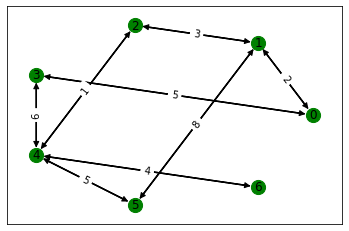

In [9]:
print(read_graph('./test_graph1.txt'))
draw_graph(read_graph('./test_graph1.txt'))

In [23]:
def adjacency_matrix_with_inf(src = './test_graph1.txt'):

    def validate_zero(num, i, j):
        if num == 0 and i != j: return inf
        return num


    matrix = []
    with open(src, 'r') as f:
        for i, line in enumerate(f):
            matrix.append([(lambda a: validate_zero(a, i, j))(int(a)) for j, a in enumerate(line.split())])
    return matrix

def adjacency_matrix(src = './test_graph1.txt'):
    matrix = []
    with open(src, 'r') as f:
        for line in f:
            matrix.append([int(a) for a in line.split()])
    return matrix

In [18]:
(lambda a: a + 5)(3)

8

In [50]:
adjacency_matrix_with_inf()

[[0, 2, 4, 3, inf, inf, inf, inf, inf],
 [2, 0, 6, inf, 10, inf, inf, inf, inf],
 [4, 6, 0, 5, 12, inf, inf, inf, inf],
 [3, inf, 5, 0, 7, 9, 13, inf, inf],
 [inf, 10, 12, 7, 0, 5, inf, 12, inf],
 [inf, inf, inf, 9, 5, 0, 4, 14, 16],
 [inf, inf, inf, 13, inf, 4, 0, inf, 10],
 [inf, inf, inf, inf, 12, 14, inf, 0, 2],
 [inf, inf, inf, inf, inf, 16, 10, 2, 0]]

# Алгоритм Дейкстры

In [44]:
def djkstra(graph_mat, start):

    def get_links(start):
        for i, weight in enumerate(graph_mat[start]):
            if weight > 0:
                yield i

    def arg_min(res_mat, seen):
        amin = -1
        m = max(res_mat)
        for i, t in enumerate(res_mat):
            if t < m and i not in seen:
                m = t
                amin = i

        return amin



    N = len(graph_mat)
    res = [inf for _ in range(N)]
    res[0] = 0

    temp_start = start

    seen = [0]

    while temp_start != -1:
        for j in get_links(temp_start):
            if j not in seen:
                w = res[temp_start] + graph_mat[temp_start][j]
                if w < res[j]:
                    res[j] = w

        temp_start = arg_min(res, seen)
        if temp_start > 0:
            seen.append(temp_start)

    return res


djkstra(adjacency_matrix(), 0)




[0, 2, 4, 3, 10, 12, 16, 22, 24]

# Алгоритм Флойда

In [57]:
def floid(matrix):

    N = len(matrix)
    P = [[i for i in range(N)] for j in range(N)]

    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = matrix[i][k] + matrix [k][j]
                if d < matrix[i][j]:
                    matrix[i][j] = d
                    P[i][j] = P[i][k]

    return matrix

v = [[0, 2, inf, 3, 1, inf, inf, 10],
     [2, 0, 4, inf, inf, inf, inf, inf],
     [inf, 4, 0, inf, inf, inf, inf, 3],
     [3, inf, inf, 0, inf, inf, inf, 8],
     [1, inf, inf, inf, 0, 2, inf, inf],
     [inf, inf, inf, inf, 2, 0, 3, inf],
     [inf, inf, inf, inf, inf, 3, 0, 1],
     [10, inf, 3, 8, inf, inf, 1, 0],
]


print(floid(adjacency_matrix_with_inf()))

[[0, 2, 4, 3, 10, 12, 16, 22, 24], [2, 0, 6, 5, 10, 14, 18, 22, 24], [4, 6, 0, 5, 12, 14, 18, 24, 26], [3, 5, 5, 0, 7, 9, 13, 19, 21], [10, 10, 12, 7, 0, 5, 9, 12, 14], [12, 14, 14, 9, 5, 0, 4, 14, 14], [16, 18, 18, 13, 9, 4, 0, 12, 10], [22, 22, 24, 19, 12, 14, 12, 0, 2], [24, 24, 26, 21, 14, 14, 10, 2, 0]]


# Алгоритм Форда Беллмана

In [ ]:
def bellman_ford(graph, start):

    distance = [inf] * graph.count_verts
    distance[start] = 0
    pred = {}

    for i in range(graph.count_verts - 1):
        for from_v, to_v, weight in graph.graph_src:
            if distance[from_v] != inf and distance[from_v] + weight < distance[to_v]: 
                distance[to_v] = distance[from_v] + weight
                pred[to_v] = from_v

    for from_v, to_v, weight in graph.graph_src:
        if distance[from_v] != inf and distance[from_v] + weight < distance[to_v]:
            print("Graph contains negative weight cycle")
    return distance, pred

# Алгоритм Йена

In [ ]:
def yena(graph, start, end, count):
    paths = []
    lengths = []
    distances, pred = bellman_ford(graph, start)
    path = get_path_B(pred, start, end)
    paths.append(path)
    lengths.append(distances[end])
    matrix = graph.get_matrix()

    mat = copy.deepcopy(matrix)
    for i in range(count-1):
        path = paths[-1]
        candidates_paths = []
        candidates_length = []
        for j in range(len(path) - 1):
            first = path[j]
            second = path[j+1]
            mat[first][second] = inf
            graph.rewrite_matrix(mat)
            distances, pred = bellman_ford(graph, start)
            if (len(pred.keys()) == 0):
                break
            new_path = get_path_B(pred, start, end)
            candidates_paths.append(new_path)
            candidates_length.append(distances[end])
        if (len(candidates_length) != 0):
            index = candidates_length.index(min(candidates_length))
            paths.append(candidates_paths[index])
            lengths.append(candidates_length[index])
    return paths, lengths

# Алгоритм Левита

In [ ]:
def levit(graph, start):
    matrix = graph.get_matrix()
    n = len(matrix)
    table = [inf for i in range(n)]
    table[start] = 0
    for_paths = [start for i in range(n)]
    m0 = set()
    m1 = [start]
    m2 = set(range(n))
    m2.remove(start)
    while len(m1):
        u = None #рассматриваемая вершина
        if len(m1):
            u = m1.pop(0)
        for i in range(n):
            if matrix[u][i] == inf:
                continue
            if i in m2:
                m2.remove(i)
                m1.append(i)
                w = table[u] + matrix[u][i]
                if w < table[i]:
                    table[i] = w
                    for_paths[i] = u
            elif i in m1:
                w = table[u] + matrix[u][i]
                if w < table[i]:
                    table[i] = w
                    for_paths[i] = u
            elif i in m0 and table[i] > table[u] + matrix[u][i]:
                m0.remove(i)
                m1.append(i)
                table[i] = table[u] + matrix[u][i]
                for_paths[i] = u
        m0.add(u)
    return table, for_paths
